Drop Table Code if I even need to use it

In [ ]:
import sqlite3

conn = sqlite3.connect("Hero.db")
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS ENTER TABLE NAME;")
conn.commit()
conn.close()

Importing the libraries I will need to use.

In [ ]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3
#import beautifulsoup4 as bs


ModuleNotFoundError: No module named 'beautifulsoup4'

Importing the data from the datasets into a Data Frame.

df.DCComics is for the DC Comic Heroes dataset.

df.Marvel is for the Marvel Comic Heroes dataset.

df.attributes is the dataset that has the attributes the heroes possess.

    Intelligence
    Strength
    Speed
    Durability
    Raw Power Score	
    Combat Ability

df.powers is the dataset that has the powers that each hero possess.

In [144]:
DCComicsdf = pd.read_csv("data/dc-wikia-data_updated.csv", encoding='utf-8')
MarvelComicsdf = pd.read_csv("data/marvel-wikia-data_update.csv", encoding='utf-8')
Superheroes_datadf = pd.read_csv("data/superheroes_data.csv", encoding='utf-8')
superherosdf = pd.read_csv("data/superheroes_updated.csv", encoding='utf-8')
print(DCComicsdf.head())
print(MarvelComicsdf.head())
print(Superheroes_datadf.head())
print(superherosdf.head())

   id             name       full-name         identity            align  \
0   1           batman   (bruce wayne)  secret identity  good characters   
1   2         superman    (clark kent)  secret identity  good characters   
2   3    green lantern    (hal jordan)  secret identity  good characters   
3   4     james gordon     (new earth)  public identity  good characters   
4   5  richard grayson     (new earth)  secret identity  good characters   

          eye        hair              sex              alive appearances  \
0   blue eyes  black hair  male characters  living characters        3093   
1   blue eyes  black hair  male characters  living characters        2496   
2  brown eyes  brown hair  male characters  living characters        1565   
3  brown eyes  white hair  male characters  living characters        1316   
4   blue eyes  black hair  male characters  living characters        1237   

  first appearance    year  
0        1939, may  1939.0  
1    1986, october  19

Getting the Column Names for DC from the CSV

In [26]:
column_names = DCComicsdf.columns.tolist()
print("Column Names:", column_names)

Column Names: ['id', 'name', 'full-name', 'identity', 'align', 'eye', 'hair', 'sex', 'alive', 'appearances', 'first appearance', 'year']


Getting the Column Names for Marvel from the CSV

In [27]:
column_names = MarvelComicsdf.columns.tolist()
print("Column Names:", column_names)

Column Names: ['id', 'name', 'full-name', 'identity', 'align', 'eye', 'hair', 'sex', 'alive', 'appearances', 'first appearance', 'year']


Getting the Column Names for the SuperHero Ability stats

In [28]:
#column_names = Superheroes_datadf.columns.tolist()
#print("Column Names:", column_names)
#DCComicsdf.isnull().sum()
MarvelComicsdf.isnull().sum()

id                     0
name                   0
full-name              6
identity            3773
align               2813
eye                 9768
hair                4266
sex                  841
alive                  5
appearances         1098
first appearance     817
year                 817
dtype: int64

Getting the Column Names for the SuperHeroes Power List

In [138]:
column_names = superherosdf.columns.tolist()
print("Column Names:", column_names)

Column Names: ['id', 'Alignment', 'Alter_Egos', 'Base', 'Character', 'Class_value', 'Collections', 'Combat', 'Creator', 'Durability', 'Equipment', 'Eye_color', 'Formerly', 'Full_name', 'Gender', 'Hair_color', 'Height', 'IQ', 'Intelligence', 'Leader', 'Level', 'Member', 'Name', 'Occupation', 'Omnipotent', 'Omnipresent', 'Omniscient', 'Place_of_birth', 'Power', 'Relatives', 'Species', 'Speed', 'Speed_velocity', 'Strength', 'Strength_force', 'Super_powers', 'Tier', 'Universe', 'Weight', 'History']


Testing out Filtering the SuperHero Powers CSV as I only want to see DC and Marvel publishers

In [119]:
filteredDC_df = superherosdf[superherosdf['Creator'] == 'DC Comics']
print("Filtered DC Comics DataFrame:\n", filteredDC_df)

filteredMarvel_df = superherosdf[superherosdf['Creator'] == 'Marvel Comics']
print("Filtered Marvel Comics DataFrame:\n", filteredMarvel_df)

Filtered DC Comics DataFrame:
             id Alignment                                         Alter_Egos  \
26        27.0      Good                                            Unknown   
27        28.0      Good                                            Unknown   
57        58.0      Good                                            Unknown   
58        59.0      Good                                            Unknown   
59        60.0      Good                                            Unknown   
...        ...       ...                                                ...   
28401  28402.0         -  Anti-Monitor,Anti-Monitor,Anti-Monitor,Anti-Mo...   
28403  28404.0      Good                                            Unknown   
28404  28405.0   Unknown                                        Doctor Fate   
28405  28406.0      Good                                            Unknown   
28407  28408.0      Good                                            Unknown   

                    

Creating the SQLite Tables for each CSV File.

In [140]:
# Create SQLite database and tables
conn = sqlite3.connect("Hero.db")
cursor = conn.cursor()

# Create tables DC_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS DCHeroes (
    id TEXT PRIMARY KEY,
    name TEXT NOT NULL,
    identity TEXT NOT NULL, 
    align TEXT NOT NULL,
    eye TEXT NOT NULL,
    hair TEXT NOT NULL,
    sex TEXT NOT NULL,
    alive TEXT NOT NULL,
    appearances TEXT NOT NULL,
    first_appearance TEXT NOT NULL,
    year TEXT NOT NULL
);
""")

# Create tables Marvel_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS MarvelHeroes (
    id TEXT PRIMARY KEY,
    name TEXT NOT NULL,
    identity TEXT NOT NULL, 
    align TEXT NOT NULL,
    eye TEXT NOT NULL,
    hair TEXT NOT NULL,
    sex TEXT NOT NULL,
    alive TEXT NOT NULL,
    appearances TEXT NOT NULL,
    first_appearance TEXT NOT NULL,
    year TEXT NOT NULL
);
""")
# Create tables SuperHeroes_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS SuperHeroes (
    id TEXT PRIMARY KEY,
    name TEXT NOT NULL,
    intelligence TEXT NOT NULL,
    strength TEXT NOT NULL,
    speed TEXT NOT NULL,
    durability TEXT NOT NULL,
    power TEXT NOT NULL,
    combat TEXT NOT NULL,
    full_name TEXT NOT NULL,
    alter_egos TEXT NOT NULL, 
    aliases TEXT NOT NULL,
    place_of_birth TEXT NOT NULL,
    first_appearance TEXT NOT NULL,
    publisher TEXT NOT NULL,
    alignment TEXT NOT NULL,
    gender TEXT NOT NULL,
    race TEXT NOT NULL,
    height TEXT NOT NULL,
    weight TEXT NOT NULL,
    eye_color TEXT NOT NULL,
    hair_color TEXT NOT NULL,
    occupation TEXT NOT NULL,
    base TEXT NOT NULL,
    group_affiliation TEXT NOT NULL, 
    relatives TEXT NOT NULL,
    url TEXT NOT NULL
);
""")
# Create tables SuperHeroesPowers_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS SuperHeroesPowers (
    id TEXT PRIMARY KEY,
    Creator TEXT NOT NULL,
    Durability TEXT NOT NULL, 
    Equipment TEXT NOT NULL, 
    Eye_color TEXT NOT NULL,
    Gender TEXT NOT NULL,
    Hair_color TEXT NOT NULL,
    IQ TEXT NOT NULL, 
    Intelligence TEXT NOT NULL, 
    Name TEXT NOT NULL,
    Occupation TEXT NOT NULL,
    Power TEXT NOT NULL,
    Relatives TEXT NOT NULL,
    Speed TEXT NOT NULL, 
    Strength TEXT NOT NULL, 
    Super_powers TEXT NOT NULL,
    Weight TEXT NOT NULL
);
""")
# Insert data into tables
DCComicsdf.to_sql("DCHeroes", conn, if_exists="replace", index=False)
MarvelComicsdf.to_sql("MarvelHeroes", conn, if_exists="replace", index=False)
Superheroes_datadf.to_sql("SuperHeroes", conn, if_exists="replace", index=False)
filtered_powers_df = superherosdf[
    (superherosdf['Creator'] == 'DC Comics') | (superherosdf['Creator'] == 'Marvel Comics')
]
filtered_powers_df.to_sql("SuperHeroesPowers", conn, if_exists="replace", index=False)

# Verify data was inserted
print("DC Heroes Table:\n")
print(pd.read_sql_query("SELECT * FROM DCHeroes", conn))

print("\Marvel Heroes Table:\n")
print(pd.read_sql_query("SELECT * FROM MarvelHeroes", conn))


print("Super Heroes Table:\n")
print(pd.read_sql_query("SELECT * FROM SuperHeroes", conn))

print("\Super Heroes Powers Table:\n")
print(pd.read_sql_query("SELECT * FROM SuperHeroesPowers", conn))


<>:104: SyntaxWarning: invalid escape sequence '\M'
<>:111: SyntaxWarning: invalid escape sequence '\S'
<>:104: SyntaxWarning: invalid escape sequence '\M'
<>:111: SyntaxWarning: invalid escape sequence '\S'
C:\Users\charl\AppData\Local\Temp\ipykernel_11436\1531654090.py:104: SyntaxWarning: invalid escape sequence '\M'
  print("\Marvel Heroes Table:\n")
C:\Users\charl\AppData\Local\Temp\ipykernel_11436\1531654090.py:111: SyntaxWarning: invalid escape sequence '\S'
  print("\Super Heroes Powers Table:\n")


DC Heroes Table:

        id              name       full-name         identity  \
0        1            batman   (bruce wayne)  secret identity   
1        2          superman    (clark kent)  secret identity   
2        3     green lantern    (hal jordan)  secret identity   
3        4      james gordon     (new earth)  public identity   
4        5   richard grayson     (new earth)  secret identity   
...    ...               ...             ...              ...   
6891  6892       nadine west     (new earth)  public identity   
6892  6893    warren harding     (new earth)  public identity   
6893  6894  william harrison     (new earth)  public identity   
6894  6895  william mckinley     (new earth)  public identity   
6895  6896            mookie     (new earth)  public identity   

                align         eye        hair                sex  \
0     good characters   blue eyes  black hair    male characters   
1     good characters   blue eyes  black hair    male characters 

Export SuperHeroesPowers table to CSV for more managable file size.

In [143]:
import csv

conn = sqlite3.connect('Hero.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM SuperHeroesPowers")
rows = cursor.fetchall()

# Export the SuperHeroesPowers table to CSV with headers
with open('data\\SuperHeroes_Updated.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    # Write headers
    writer.writerow([i[0] for i in cursor.description])
    # Write the data rows
    writer.writerows(rows)
conn.close()

Dealing with the Null Values in the Datasets

In [32]:
# Fill NA/NaN values for all loaded DataFrames

# For DCComicsdf
DCComicsdf = DCComicsdf.fillna('Unknown')

# For MarvelComicsdf
MarvelComicsdf = MarvelComicsdf.fillna('Unknown')

# For Superheroes_datadf
Superheroes_datadf = Superheroes_datadf.fillna('Unknown')

# For superherosdf
superherosdf = superherosdf.fillna('Unknown')

The below code is to create a Function to give the user the choice of which Publisher they want to use in order to see how many heroes exist of each Gender.

Count for each sex category:
sex
male characters           11636
female characters          3836
agender characters           45
robot                         7
sentinel                      4
android                       4
genderfluid characters        2
alien                         1
Name: count, dtype: int64


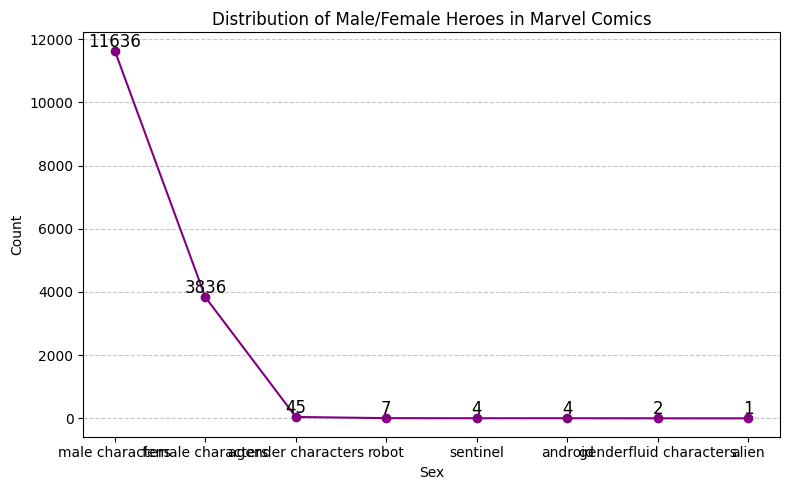

In [9]:
def hero_gender_distribution():
    publisher_choice = input("Enter 'DC Comics' or 'Marvel Comics': ").strip().lower()
    if publisher_choice == "dc comics":
        table_name = "DCHeroes"
    elif publisher_choice == "marvel comics":
        table_name = "MarvelHeroes"
    else:
        print("Invalid choice. Please enter 'DC Comics' or 'Marvel Comics'.")
        hero_gender_distribution()
        return

    # Connect to your SQLite database
    conn = sqlite3.connect('Hero.db')

    # Query for all heroes' sex
    query = f"SELECT sex FROM {table_name}"
    df = pd.read_sql(query, conn)
    conn.close()

    # Count the number of each sex
    sex_counts = df['sex'].value_counts()
    print("Count for each sex category:")
    print(sex_counts)

    # Horizontal bar chart
    plt.figure(figsize=(8, 5))
    plt.plot(sex_counts.index, sex_counts.values, marker='o', linestyle='-', color='purple')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.title(f'Distribution of Male/Female Heroes in {publisher_choice.title()}')
    for i, v in enumerate(sex_counts.values):
        plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call the function
hero_gender_distribution()

The below code is to create a Function to give the user the choice of which Publisher they want to use in order to see how many heroes are deceased by publisher and Gender.

Deceased hero counts by sex for Marvel Comics:
sex
male characters       2869
female characters      763
agender characters       6
sentinel                 4
robot                    1
android                  1
Name: count, dtype: int64


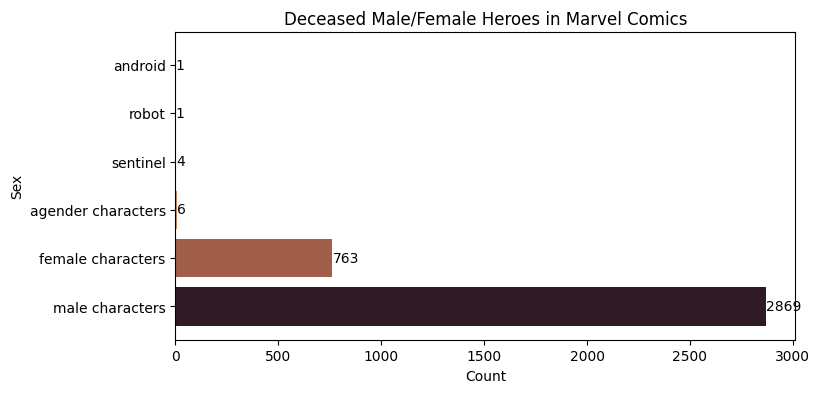

In [10]:
def deceased_hero_gender_ratio():
    publisher = input("Enter 'DC Comics' or 'Marvel Comics': ").strip()
    # Choose the correct table based on user input
    if publisher.lower() == "dc comics":
        table_name = "DCHeroes"
    elif publisher.lower() == "marvel comics":
        table_name = "MarvelHeroes"
    else:
        print("Invalid publisher. Use 'DC Comics' or 'Marvel Comics'.")
        deceased_hero_gender_ratio()
        return

    # Connect to the database
    conn = sqlite3.connect('Hero.db')
    # Query for deceased heroes (living or deceased characters') and their sex
    query = f"SELECT sex FROM {table_name} WHERE alive='deceased characters'"
    df = pd.read_sql(query, conn)
    conn.close()

    # Count the number of each sex
    sex_counts = df['sex'].value_counts()
    print(f"Deceased hero counts by sex for {publisher}:")
    print(sex_counts)

    # Horizontal bar chart
    plt.figure(figsize=(8, 4))
    plt.barh(sex_counts.index, sex_counts.values, color=['#2F1B25', '#A15E49', '#CA895F', '#E3D26F'])
    plt.xlabel('Count')
    plt.ylabel('Sex')
    plt.title(f'Deceased Male/Female Heroes in {publisher}')
    for i, v in enumerate(sex_counts.values):
        plt.text(v + 1, i, str(v), va='center')
    plt.show()

# Call the function
deceased_hero_gender_ratio()

The below code will join the selected Publisher dataset with the superheroespowers dataset to display each heroes powers along with other stats. (Using SQLite tables for this functionality).

In [121]:
def join_publisher_with_powers_and_display():
    publisher = input("Enter 'DC Comics' or 'Marvel Comics': ").strip()
    # Choose the correct table based on user input
    if publisher.lower() == "dc comics":
        table_name = "DCHeroes"
    elif publisher.lower() == "marvel comics":
        table_name = "MarvelHeroes"
    else:
        print("Invalid publisher. Use 'DC Comics' or 'Marvel Comics'.")
        join_publisher_with_powers_and_display()
        return

      # Connect to the database
    conn = sqlite3.connect('Hero.db')

    # Perform SQL JOIN on UPPERCASE name fields and drop nulls after reading
    query = f"""
        SELECT h.name, h.identity, h.align, h.eye, h.hair, h.sex, h.alive, p.Alignment, p.Creator, p.gender, p.Hair_color, p.name, p.Occupation, p.Super_powers
        FROM {table_name} h
        JOIN SuperHeroesPowers p
        ON UPPER(h.name) = UPPER(p.Name)
        WHERE p.Creator like '{publisher}'
    """
    merged_df = pd.read_sql(query, conn)
    conn.close()

    # Drop rows with any null values
    merged_df = merged_df.dropna()

    # Display the results
    print(f"Merged data for {publisher}:")
    display(merged_df)

# Calling the function
join_publisher_with_powers_and_display()

Merged data for DC Comics:


,name,identity,align,eye,hair,sex,alive,Alignment,Creator,Gender,Hair_color,Name,Occupation,Super_powers
0,stephanie brown,secret identity,good characters,blue eyes,blond hair,female characters,living characters,Good,DC Comics,Female,Blond,Stephanie Brown,Vigilante,"Adaptation,Agility,Dexterity,Durability,Gadget..."
1,stephanie brown,secret identity,good characters,blue eyes,blond hair,female characters,living characters,Good,DC Comics,Female,Blond,Stephanie Brown,Vigilante,"Adaptation,Agility,Dexterity,Durability,Gadget..."
2,ace arn,secret identity,good characters,black eyes,white hair,male characters,living characters,Unknown,DC Comics,Unknown,Unknown,Ace Arn,Unknown,"Agility,Electrokinesis,Endurance,Flight,Intell..."
3,ace arn,secret identity,good characters,black eyes,white hair,male characters,living characters,Unknown,DC Comics,Unknown,Unknown,Ace Arn,Unknown,"Agility,Electrokinesis,Endurance,Flight,Intell..."
4,"arthur curry, jr.",public identity,neutral characters,blue eyes,blond hair,male characters,deceased characters,Unknown,DC Comics,Unknown,Unknown,"Arthur Curry, Jr.",Unknown,"Durability,Stamina,Super Speed,Super Strength,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,george harkness,secret identity,Unknown,brown eyes,brown hair,male characters,living characters,Unknown,DC Comics,Unknown,Unknown,George Harkness,Unknown,Unknown
1958,kal-el,public identity,good characters,gold eyes,gold hair,male characters,living characters,Bad,DC Comics,Male,Black,Kal-El,Unknown,"Accelerated Healing,Bullet Time,Durability,End..."
1959,zatanna zatara,public identity,good characters,blue eyes,black hair,female characters,living characters,Good,DC Comics,Unknown,Unknown,Zatanna Zatara,Unknown,Unknown
1960,zatanna zatara,public identity,good characters,blue eyes,black hair,female characters,living characters,Good,DC Comics,Female,Black,Zatanna Zatara,Unknown,Unknown


Here’s a function that lets the user select a publisher and displays the gender distribution as a pie chart, ensuring all values and labels are visible:

Count for each sex category:
sex
male characters           4783
female characters         1966
genderless characters       20
transgender characters       1
Name: count, dtype: int64


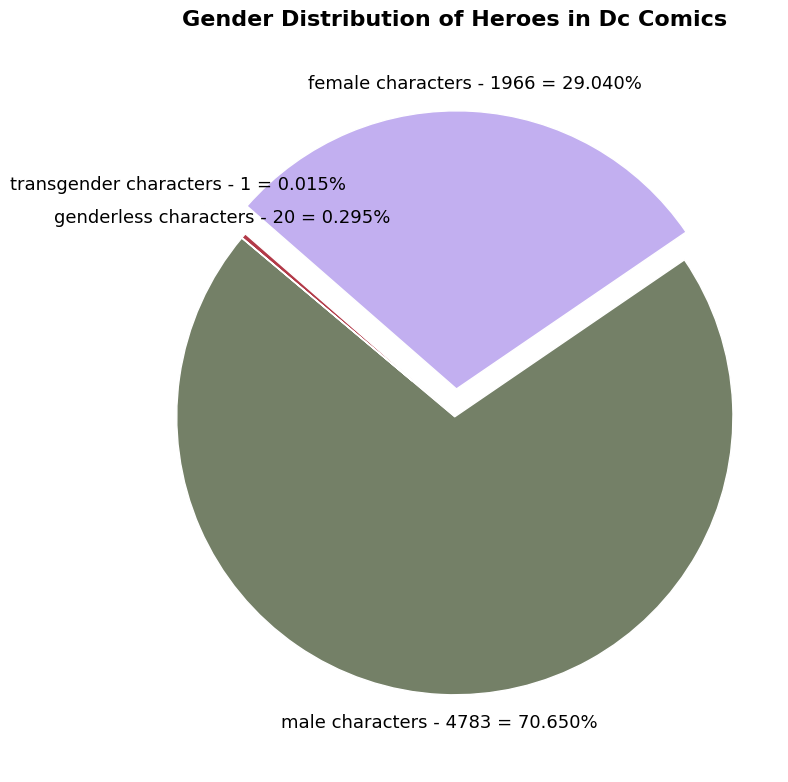

In [130]:
def hero_gender_exploded_pie_chart():
    publisher_choice = input("Enter 'DC Comics' or 'Marvel Comics': ").strip().lower()
    if publisher_choice == "dc comics":
        table_name = "DCHeroes"
    elif publisher_choice == "marvel comics":
        table_name = "MarvelHeroes"
    else:
        print("Invalid choice. Please enter 'DC Comics' or 'Marvel Comics'.")
        return

    conn = sqlite3.connect('Hero.db')
    query = f"SELECT sex FROM {table_name}"
    df = pd.read_sql(query, conn)
    conn.close()


    df = df.dropna(subset=['sex'])
    df = df[df['sex'].str.lower() != 'unknown']
    sex_counts = df['sex'].value_counts()
    print("Count for each sex category:")
    print(sex_counts)

    total = sex_counts.sum()
    labels = [f"{label} - {count} = {count/total:.3%}" for label, count in zip(sex_counts.index, sex_counts.values)]

    # Dynamically set explode values for 4 or 8 slices
    n = len(sex_counts)
    if n == 4:
        explode = (0, 0.1, 0, 0.2)
    elif n == 8:
        explode = (0, 0.05, 0, 0.5, 0.3, 0.7, 0.9, 1.1)
    else:
        explode = tuple([0.1 if i == 1 else 0 for i in range(n)])  

    plt.figure(figsize=(8, 8))
    patches, texts = plt.pie(
        sex_counts.values,
        colors=['#748067', '#C2AFF0', '#B23A48', '#5DA271', 
                 '#CC99FF', '#FF66B3', '#99FFCC', '#CCFF99'],
        labels=labels,
        explode=explode,
        startangle=140,
        textprops={'fontsize': 13, 'ha': 'center'},
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    plt.title(f"Gender Distribution of Heroes in {publisher_choice.title()}", fontsize=16, weight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Call the function
hero_gender_exploded_pie_chart()

Vertical Bar Chart showing how many Comic Book Characters were created every 40 years by Publisher.

C:\Users\charl\AppData\Local\Temp\ipykernel_15996\1753487330.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = combined_df.groupby(['year_bin', 'Publisher']).size().unstack(fill_value=0)


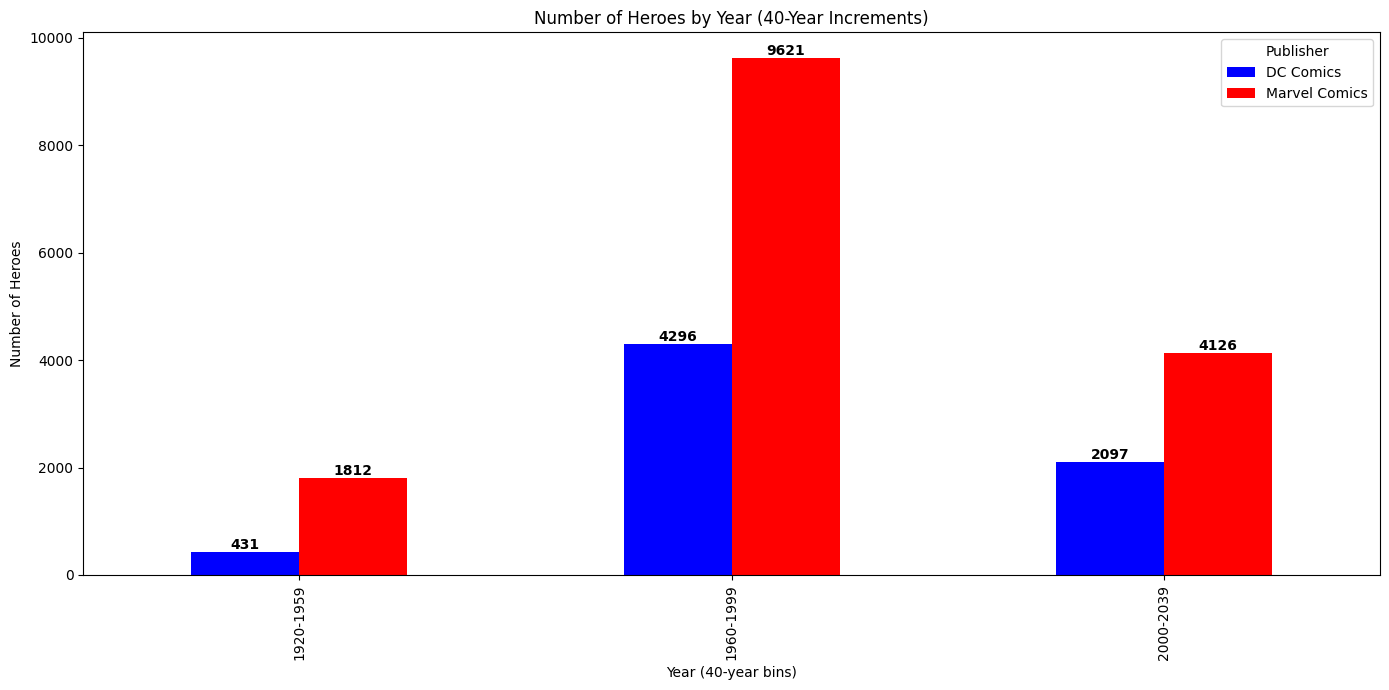

In [26]:
def hero_year_40yr_bar_chart():
    conn = sqlite3.connect('Hero.db')
    # Get DC data
    dc_df = pd.read_sql("SELECT name, year FROM DCHeroes", conn)
    dc_df = dc_df[dc_df['year'].apply(lambda x: str(x).isdigit())]
    dc_df['year'] = dc_df['year'].astype(int)
    dc_df['Publisher'] = 'DC Comics'
    # Get Marvel data
    marvel_df = pd.read_sql("SELECT name, year FROM MarvelHeroes", conn)
    marvel_df['year'] = pd.to_numeric(marvel_df['year'], errors='coerce')
    marvel_df = marvel_df.dropna(subset=['year'])
    marvel_df['year'] = marvel_df['year'].astype(int)
    marvel_df['Publisher'] = 'Marvel Comics'
    conn.close()

    # Combine
    combined_df = pd.concat([dc_df, marvel_df], ignore_index=True)

    # Create 40-year bins
    min_year = combined_df['year'].min()
    max_year = combined_df['year'].max()
    bins = list(range((min_year // 40) * 40, ((max_year // 40) + 2) * 40, 40))
    labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
    combined_df['year_bin'] = pd.cut(combined_df['year'], bins=bins, labels=labels, right=False)

    # Count heroes per bin and publisher
    grouped = combined_df.groupby(['year_bin', 'Publisher']).size().unstack(fill_value=0)

    # Plot vertical bar chart
    ax = grouped.plot(kind='bar', figsize=(14, 7), color=['blue', 'red'])
    plt.xlabel('Year (40-year bins)')
    plt.ylabel('Number of Heroes')
    plt.title('Number of Heroes by Year (40-Year Increments)')
    plt.legend(title='Publisher')
    plt.tight_layout()

    # Add count labels on top of each bar
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(str(height), 
                        (p.get_x() + p.get_width() / 2, height), 
                        ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.show()

# Call the function
hero_year_40yr_bar_chart()

Vertical Bar Chart showing how many Comic Book Characters were created every 40 years by Publisher and Gender.

C:\Users\charl\AppData\Local\Temp\ipykernel_15996\3867622608.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = combined_df.groupby(['year_bin', 'Publisher', 'sex']).size().unstack(['Publisher', 'sex']).fillna(0)


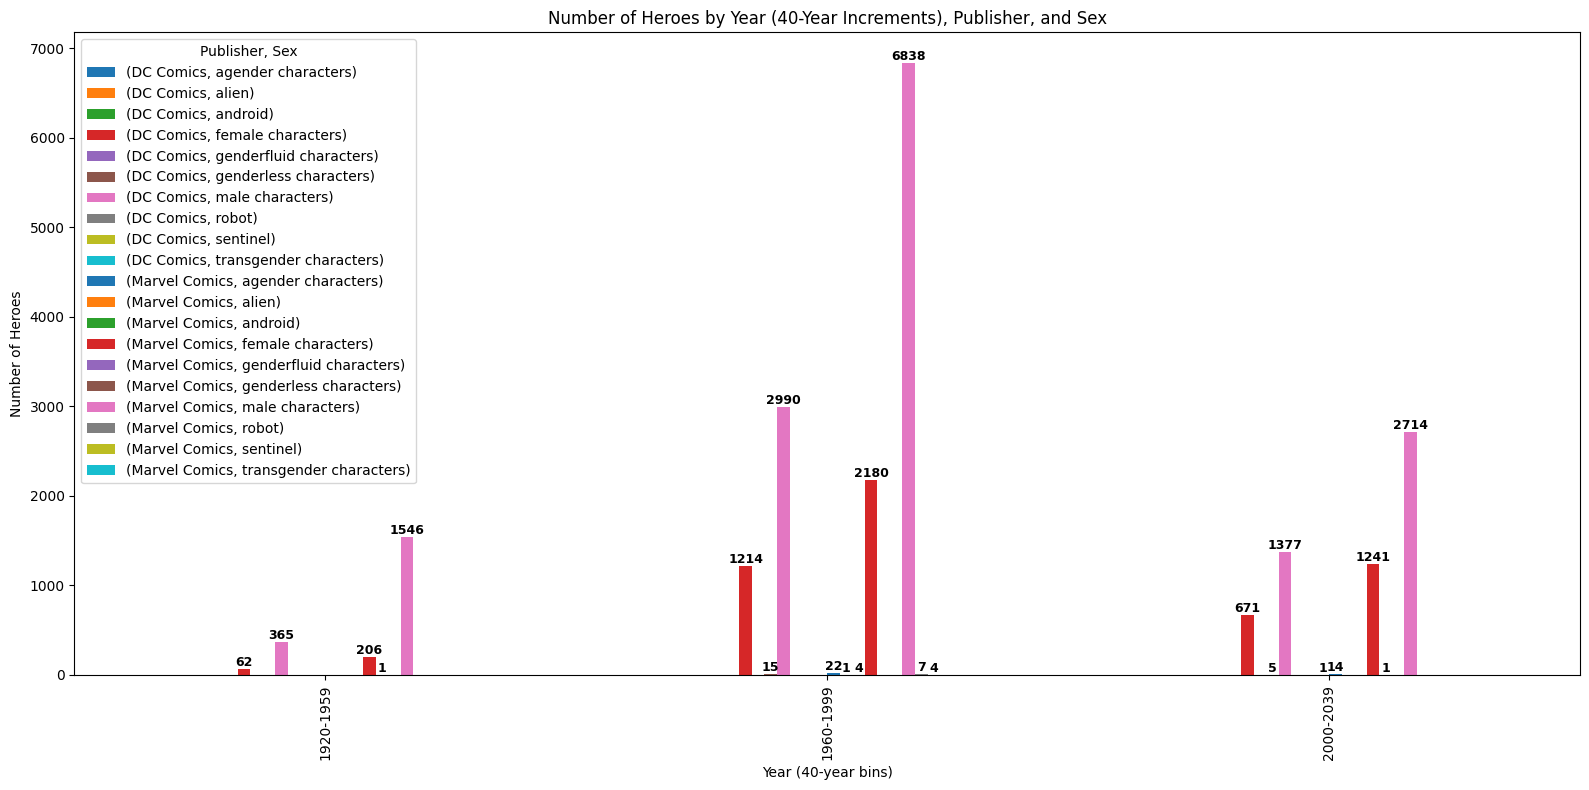

In [28]:
def hero_year_40yr_bar_chart_by_sex():
    conn = sqlite3.connect('Hero.db')
    # Get DC data
    dc_df = pd.read_sql("SELECT name, year, sex FROM DCHeroes", conn)
    dc_df = dc_df[dc_df['year'].apply(lambda x: str(x).isdigit())]
    dc_df['year'] = dc_df['year'].astype(int)
    dc_df['Publisher'] = 'DC Comics'
    # Get Marvel data
    marvel_df = pd.read_sql("SELECT name, year, sex FROM MarvelHeroes", conn)
    marvel_df['year'] = pd.to_numeric(marvel_df['year'], errors='coerce')
    marvel_df = marvel_df.dropna(subset=['year'])
    marvel_df['year'] = marvel_df['year'].astype(int)
    marvel_df['Publisher'] = 'Marvel Comics'
    conn.close()

    # Combine
    combined_df = pd.concat([dc_df, marvel_df], ignore_index=True)

    # Create 40-year bins
    min_year = combined_df['year'].min()
    max_year = combined_df['year'].max()
    bins = list(range((min_year // 40) * 40, ((max_year // 40) + 2) * 40, 40))
    labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
    combined_df['year_bin'] = pd.cut(combined_df['year'], bins=bins, labels=labels, right=False)

    # Group by year_bin, Publisher, and sex
    grouped = combined_df.groupby(['year_bin', 'Publisher', 'sex']).size().unstack(['Publisher', 'sex']).fillna(0)

    # Plot
    ax = grouped.plot(kind='bar', figsize=(16, 8))
    plt.xlabel('Year (40-year bins)')
    plt.ylabel('Number of Heroes')
    plt.title('Number of Heroes by Year (40-Year Increments), Publisher, and Sex')
    plt.legend(title='Publisher, Sex')
    plt.tight_layout()

    # Add count labels on top of each bar
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(str(height),
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.show()

# Call the function
hero_year_40yr_bar_chart_by_sex()